## Project Name : Predicting Survival in the Titanic Data Set.

 We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

 Dataset can be download directly using pandas from the below link

 https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

## Lifecycle in this project: 
  1. Data Analysis
  2. Feature Engineering 
  3. Feature Selection 
  4. Model Building 
  5. Model Deployment

***# Data Analysis***
    
    1. Missing values
    2. All the numerical Variables
    3. Distribution of the Numerical variables.
    4. Categorical Variable
    5. Cardinality of categorical variable.
    6. Outliers
    7. Relationshp between independent and dependent feature (Survived) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)
titanic.columns = ['PassengerID','Survived','Pclass','Name','Sex','Age','sibSp','Parch','Ticket','Fare','Cabin','Embarked']   

In [3]:
titanic.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,sibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   sibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerID,Survived,Pclass,Age,sibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.shape # getting the shape of our dataset

(891, 12)

In [7]:
# missing values 
feature_having_na = [features for features in titanic.columns if titanic[features].isnull().sum() > 1 ]
print("the features having null values are :- ", feature_having_na)

the features having null values are :-  ['Age', 'Cabin', 'Embarked']


In [8]:
# lets's check the percentage of null values present in the dataset
for feature in feature_having_na:
  print(f'{feature} feature are having {np.round(titanic[feature].isnull().mean()*100, 2)} % of null values with respect to the dataset')

Age feature are having 19.87 % of null values with respect to the dataset
Cabin feature are having 77.1 % of null values with respect to the dataset
Embarked feature are having 0.22 % of null values with respect to the dataset


Conclusion 1: A normal understanding say that if a particular feature are having more than 95% of null values then we should remove that feature and where there is very few null values present we must replace those values with median or mean (prefer to use median value of that feature column values).

### Let's try to find out the relationship between null values and survived 

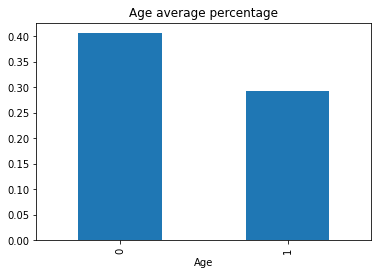

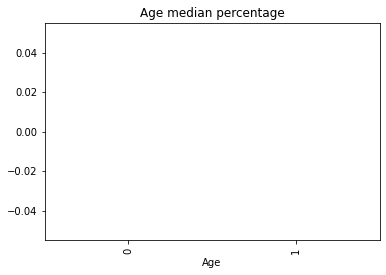

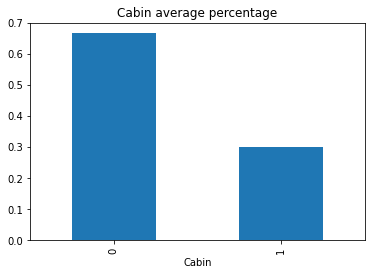

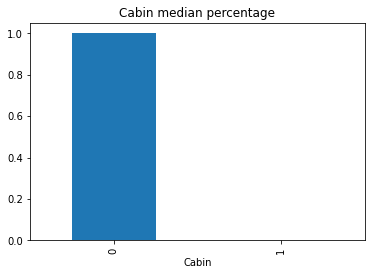

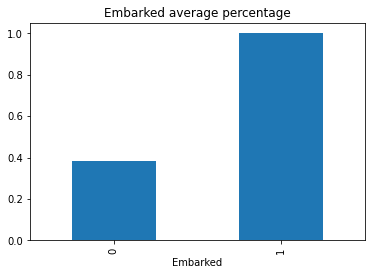

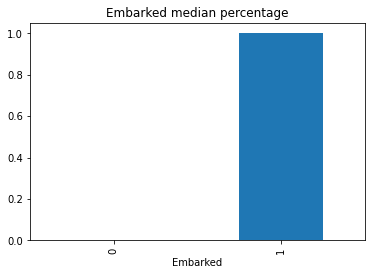

In [9]:
for feature in feature_having_na:
  data = titanic.copy()
  data[feature] = np.where(data[feature].isnull(),1,0) # replacing the not null values with 0 and nnull values with 1 making it descreate for visualization
  data.groupby(feature)['Survived'].mean().plot.bar()
  plt.title(feature + ' average percentage')
  plt.show()
  data.groupby(feature)['Survived'].median().plot.bar()
  plt.title(feature + ' median percentage')
  plt.show()

Conclusion :
  1. cabin has more number of null values and the values are very strongly related with the target value.
  2.where as Embarked feature is totally reveresed more number of people survived. we will replace those null values.

## Numerical Variables

In [10]:
numerical_feature = [feature for feature in titanic.columns if titanic[feature].dtypes != 'O']
titanic[numerical_feature].head()

,PassengerID,Survived,Pclass,Age,sibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
# let's try to find out the descreate variables 
discrete_feature = [feature for feature in numerical_feature if len(titanic[feature].unique())<25 and  feature not in 'Survived']

In [12]:
discrete_feature

['Pclass', 'sibSp', 'Parch']

all these feature are basically the descrete features

In [13]:
titanic[discrete_feature].head()

,Pclass,sibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


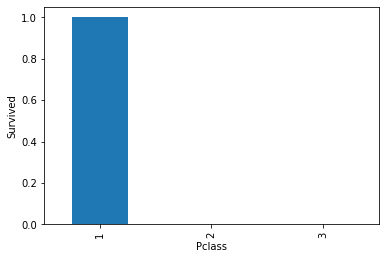

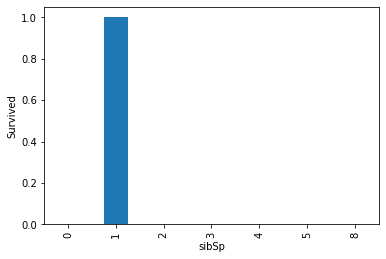

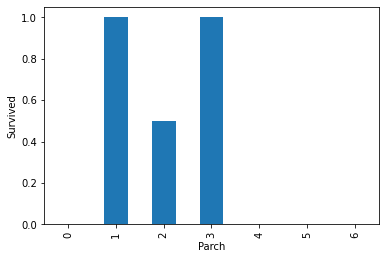

In [14]:
# let's visualize the descrete features
for feature in discrete_feature:
  data = titanic.copy()
  data.groupby(feature)['Survived'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Survived')
  plt.show()

Conclusion :  

  1. most number of people who survived are from pclass -1 
  2. similarly people survived from sibSp ishaving 1 values and
  3. parch value of 1 and 3 survived most.

In [35]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature and feature not in ['Survived', 'PassengerID'] ]

In [36]:
titanic[continous_feature].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


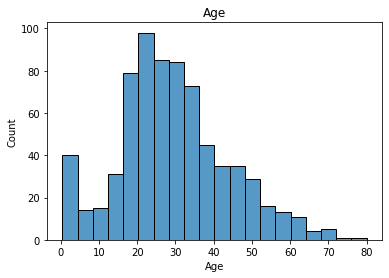

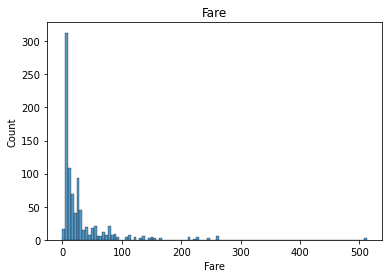

In [41]:
for feature in continous_feature:
  data = titanic.copy()
  sb.histplot(data[feature])
  plt.title(feature) 
  plt.show()


Conclusion :
  
   Age is slightlly followin the gaussian distribution but when it comes to Fare the data are very much skews here on left side which shows the number of people having fare between 0-100 is 80% and rest went above to 100 .

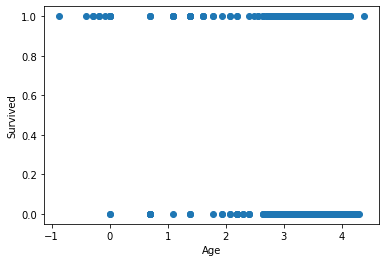

In [42]:
data = titanic.copy()
for feature in continous_feature:
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    plt.scatter(data[feature],data['Survived'])
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.show()

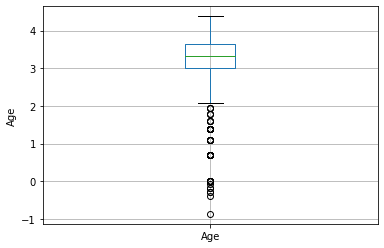

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


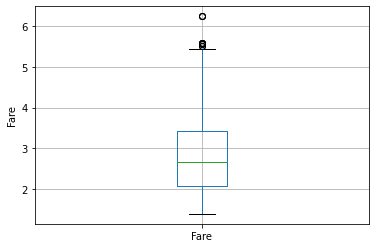

In [45]:
#let's check the outliers present
for feature in continous_feature:
  data  = titanic.copy()
  data[feature] = np.log(data[feature])
  data.boxplot(column = feature)
  plt.ylabel(feature)
  plt.show()


Definetly there are some outliers present in the dataset.

In [46]:
# categorical Variabel
cat_variables = [feature for feature in titanic.columns if titanic[feature].dtypes == 'O']

In [48]:
titanic[cat_variables].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


When we deals with categorical value we mus firstly focus on what could be the number of different categories present to it.

In [50]:
for feature in cat_variables:
  if feature not in 'Name':
    print(f'feature {feature} has {titanic[feature].nunique()} number of unique values')

feature Sex has 2 number of unique values
feature Ticket has 681 number of unique values
feature Cabin has 147 number of unique values
feature Embarked has 3 number of unique values


Name and Ticker name can be removed from the dataset completly because they are not adding any kind of information.

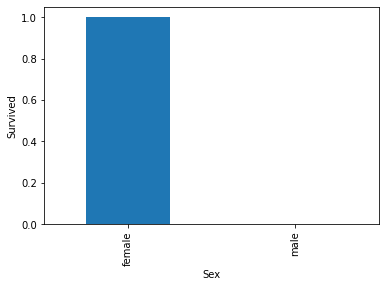

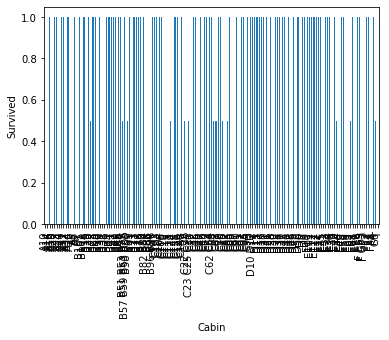

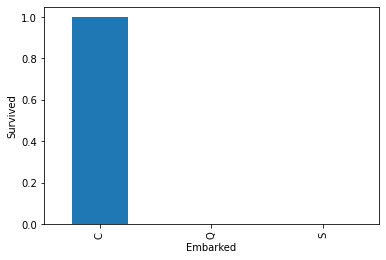

In [57]:
# finding out the relation ship between catfeature and target
for feature in cat_variables:
  data = titanic.copy()
  if feature not in ['Name','Ticket']:
    data.groupby(feature)['Survived'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.show()

definetly we can conclude that 
  1. more number of female passenger have been survived with respect to male.
  2. Cabin has approx 147 different values and seeing the plot we cannot make any conclusion so it's better to drop it.
  3. Embarked value of C has the highet rate of getting Survived.

Data leakage :Data leakage refers to a mistake that is made by the creator of a machine learning model in which information about the target variable is leaking into the input of the model during the training of the model; information that will not be available in the ongoing data that we would like to predict on. when we do the feature engineering without splitting the dataset into train and test we fall into the scenario so it better to split the dataset into train and test and then apply the feature engineering first on the train and then train  the model and apply the same technique to the test data.

In [58]:
# let's split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(titanic,titanic['Survived'],test_size=0.1,random_state = 42)

In [62]:
X_train.head() , X_train.shape

(     PassengerID  Survived  Pclass  \
 165          166         1       3   
 541          542         0       3   
 625          626         0       1   
 388          389         0       3   
 76            77         0       3   
 
                                                 Name     Sex   Age  sibSp  \
 165  Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
 541             Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
 625                            Sutton, Mr. Frederick    male  61.0      0   
 388                             Sadlier, Mr. Matthew    male   NaN      0   
 76                                 Staneff, Mr. Ivan    male   NaN      0   
 
      Parch  Ticket     Fare Cabin Embarked  
 165      2  363291  20.5250   NaN        S  
 541      2  347082  31.2750   NaN        S  
 625      0   36963  32.3208   D50        S  
 388      0  367655   7.7292   NaN        Q  
 76       0  349208   7.8958   NaN        S  , (801, 12))

In [63]:
y_train.head() , y_train.shape

(165    1
 541    0
 625    0
 388    0
 76     0
 Name: Survived, dtype: int64, (801,))

# feature engineering

# handling the missing values

In [67]:
## replacing the missing value with new label
def replace_cat_feature(dataset,feature_nan):
  data = dataset.copy()
  data[feature_nan] = data[feature_nan].fillna('Missing')
  return data
titanic = replace_cat_feature(titanic,['Sex','Embarked'])
titanic.isnull().sum()

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
sibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

from Embarked and Sex allvalues have been replaced

,PassengerID,Survived,Pclass,Name,Sex,Age,sibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# for numerical feature
for feature in numerical_feature:
  median_value = titanic[feature]
  titanic[feature+'nan'] = np.where(titanic[feature],1,0)
  titanic[feature].fillna(median_value,inplace = True)

titanic[numerical_feature].isnull().sum()


PassengerID      0
Survived         0
Pclass           0
Age            177
sibSp            0
Parch            0
Fare             0
dtype: int64

In [70]:
titanic.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,sibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerIDnan,Survivednan,Pclassnan,Agenan,sibSpnan,Parchnan,Farenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,1,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,1,0,0,1


In [85]:
len(titanic['Cabin'].value_counts())

147

In [71]:
#
for feature in cat_variables:
  median_value = titanic[feature]
  titanic[feature].fillna(median_value,inplace = True)


In [72]:
titanic[cat_variables].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      0
dtype: int64

# let's drop some feature that have no meaning at all or which are not addin any information to the dataset. like, passanger Id, Name , cabin , Ticket name

In [86]:
titanic.drop(['Name','PassengerID','Cabin','Ticket'],axis=1,inplace = True)

In [87]:
titanic.head()

,Survived,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,PassengerIDnan,Survivednan,Pclassnan,Agenan,sibSpnan,Parchnan,Farenan
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1,1,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,1,1,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,1,1,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,1,0,0,1


In [89]:
# handling categorical variable 
for feature in cat_variables:
  try:
    temp = titanic.groupby(feature)['Survived'].count()/len(titanic)
    temp_df = temp[temp>0.01].index
    titanic[feature] = np.where(titanic[feature].isin(temp_df), titanic[feature],'Rare_var')
  except Exception as e:
    pass

In [90]:
titanic.head()

,Survived,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,PassengerIDnan,Survivednan,Pclassnan,Agenan,sibSpnan,Parchnan,Farenan
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1,1,1,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,1,1,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,1,1,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,1,0,0,1


In [91]:
titanic['Embarked'].value_counts()

S           644
C           168
Q            77
Rare_var      2
Name: Embarked, dtype: int64

There are only two rare values

In [92]:
data = titanic[['Pclass','Sex','Age','sibSp','Parch','Fare','Embarked','Survived']]

In [93]:
data.head()

,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [112]:
# let's replace nan value in continous valule
def impute_nan(DataFrame, ColumnName, ImputeValue):
    DataFrame[ColumnName + "_Imputed"] =                                                     DataFrame[ColumnName].fillna(ImputeValue)
# Call function to impute median value
median = data.Age.median()
impute_nan(data, 'Age', median)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


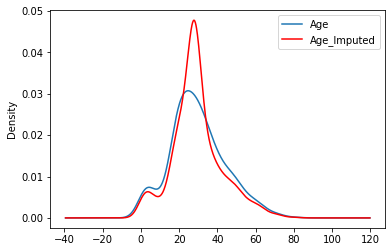

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [114]:
data['Age'].fillna(median,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [115]:
data.isna().sum()

Pclass         0
Sex            0
Age            0
sibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
Age_Imputed    0
dtype: int64

# let's do label encoding of all the categorical variables

In [116]:
data2 = pd.get_dummies(data, columns = ['Sex', 'Embarked'])

In [117]:
data2.columns

Index(['Pclass', 'Age', 'sibSp', 'Parch', 'Fare', 'Survived', 'Age_Imputed',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_Rare_var', 'Embarked_S'],
      dtype='object')

In [118]:
# feature scaling 
features_scale = [feature for feature in data2.columns if feature not in ['Survived']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data2[features_scale])

MinMaxScaler()

In [119]:
scaler.transform(data2[features_scale])

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.4722292 , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.34656949, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [120]:
data3 = pd.concat([data2[['Survived']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(data2[features_scale]), columns = features_scale)],
                    axis  =1)

In [121]:
data3.head()

,Survived,Pclass,Age,sibSp,Parch,Fare,Age_Imputed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_Rare_var,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,0.271174,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,0.472229,0.125,0.0,0.139136,0.472229,1.0,0.0,1.0,0.0,0.0,0.0
2,1,1.0,0.321438,0.000,0.0,0.015469,0.321438,1.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.434531,0.125,0.0,0.103644,0.434531,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,0.434531,0.000,0.0,0.015713,0.434531,0.0,1.0,0.0,0.0,0.0,1.0


In [122]:
data3.to_csv('filtered_data.csv',index= False)

In [123]:
# let's split the dataset and then predict it 
X = data3.drop('Survived',axis=1)
y = data3['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [124]:
X_train.head()

,Pclass,Age,sibSp,Parch,Fare,Age_Imputed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_Rare_var,Embarked_S
445,0.0,0.044986,0.000,0.333333,0.159777,0.044986,0.0,1.0,0.0,0.0,0.0,1.0
650,1.0,0.346569,0.000,0.000000,0.015412,0.346569,0.0,1.0,0.0,0.0,0.0,1.0
172,1.0,0.007288,0.125,0.166667,0.021731,0.007288,1.0,0.0,0.0,0.0,0.0,1.0
450,0.5,0.447097,0.125,0.333333,0.054164,0.447097,0.0,1.0,0.0,0.0,0.0,1.0
314,0.5,0.535059,0.125,0.166667,0.051237,0.535059,0.0,1.0,0.0,0.0,0.0,1.0


In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 12), (268, 12), (623,), (268,))

In [129]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [127]:
predicted_value = model.predict(X_test)
print(predicted_value)

[0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 1 0 0 0 0 0]


In [ ]:
plot_tree(model)

In [135]:
zeroes = 0
ones = 0
for i in range(0,len(y_train)):
    if list(y_train)[i] == 0:
        zeroes +=1
    else:
        ones +=1
#%%       
print(zeroes)
print(ones)
#%%
val = 1 - ((zeroes/70)*2 + (ones/70)*2)
print("Gini :",val)
  
match = 0
UnMatch = 0
  
for i in range(30):
    if predicted_value[i] == list(y_test)[i]:
        match += 1
    else:
        UnMatch += 1
          
accuracy = match/30
print("Accuracy is: ",accuracy)

392
231
Gini : -16.799999999999997
Accuracy is:  0.6333333333333333


We have got an accuracy of 63.33 % 

Let's Improve the accuracy 

Let's try to understand the dataset and try to make some more information.
  1. we can get the famility size with the help of addition of  Sibsp and Parch, family size matters because in the emotion of family protection onr or two people from the family could die. 
  2. we can also fetch if the cabin is present the reason if a person get trapped inside the cabin he will surely die but, the person we are not in cabin could possibly survived.

In [139]:
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)
titanic.columns = ['PassengerID','Survived','Pclass','Name','Sex','Age','sibSp','Parch','Ticket','Fare','Cabin','Embarked']   

In [140]:
titanic.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,sibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
titanic.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

str

In [153]:
titanic['has_cabin'] = titanic['Cabin'].apply(lambda x:0 if type(x) == float else 1)

In [154]:
# next we will drop the name , ticket, cabin, and PassengerID
titanic.drop(['PassengerID','Name','Ticket','Cabin'],axis=1, inplace = True)

In [155]:
titanic.head()

,Survived,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [158]:
titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

there is only two values let's replace Nan value with Q

In [159]:
titanic['Embarked'] = titanic['Embarked'].fillna('Q')

In [160]:
titanic.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
sibSp          0
Parch          0
Fare           0
Embarked       0
has_cabin      0
dtype: int64

# now we have left with Age 

In [161]:
median = data.Age.median()
titanic['Age'].fillna(median,inplace = True)

In [162]:
titanic.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
sibSp        0
Parch        0
Fare         0
Embarked     0
has_cabin    0
dtype: int64

no null values left now

In [163]:
# let's check the dtype of the feature columns
titanic.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
sibSp          int64
Parch          int64
Fare         float64
Embarked      object
has_cabin      int64
dtype: object

In [167]:
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [170]:
titanic['Sex'] = titanic['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [171]:
titanic.head()

,Survived,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,has_cabin
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0


Can we map Fare Values into some categories yes we can besed upon the cabin size and other aspect 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


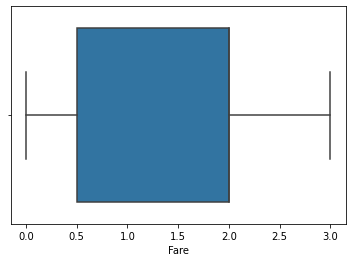

In [175]:
sb.boxplot(titanic['Fare'])

In [172]:
# let's try to undersand the Fare columns more deeply 
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Since there is no outlier present in Fare let's try to make group based upon this description we can make group 0-25 , 25-50% , 50-75:% and 75% - max

In [173]:
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare']  = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3
titanic['Fare'] = titanic['Fare'].astype(int)

We can do the same thing with the Age column too

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


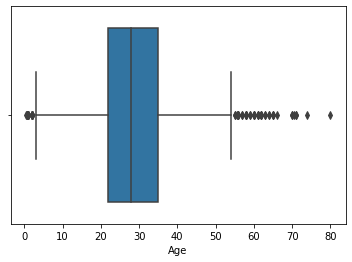

In [176]:
sb.boxplot(titanic['Age'])

Age column has some outliers present so let's first detect and remove this outliers

In [182]:
Q1 = np.percentile(titanic['Age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(titanic['Age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ",titanic.shape)
 
# Upper bound
upper = np.where(titanic['Age']>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(titanic['Age'] <= (Q1-1.5*IQR))
 

Old Shape:  (891, 9)


In [183]:
# let's remove it
titanic.drop(upper[0], inplace = True)
titanic.drop(lower[0], inplace = True)
 
print("New Shape: ", titanic.shape)

New Shape:  (825, 9)


In [184]:
# let's try to undersand the Age columns more deeply 
titanic['Age'].describe()

count    825.000000
mean      28.515152
std       10.177256
min        3.000000
25%       22.000000
50%       28.000000
75%       34.000000
max       54.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


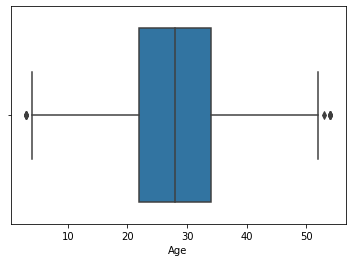

In [185]:
sb.boxplot(titanic['Age'])

very few outliers are still present but whole a lot has been removed successfully. we can go with the description and try to make the groups.
min-25% , 25% - 50%, 50%-75% and 75% - max

In [186]:
# Mapping Age
titanic.loc[ titanic['Age'] <= 3, 'Age']  = 0
titanic.loc[(titanic['Age'] > 3) & (titanic['Age'] <= 22), 'Age'] = 1
titanic.loc[(titanic['Age'] > 22) & (titanic['Age'] <= 28), 'Age'] = 2
titanic.loc[(titanic['Age'] > 28) & (titanic['Age'] <= 34), 'Age'] = 3
titanic.loc[ titanic['Age'] > 34, 'Age']  = 4;

In [188]:
titanic['Age'] =titanic['Age'].astype(int)

In [189]:
titanic.head()

,Survived,Pclass,Sex,Age,sibSp,Parch,Fare,Embarked,has_cabin
0,0,3,1,1,1,0,0,0,0
1,1,1,0,4,1,0,3,1,1
2,1,3,0,2,0,0,1,0,0
3,1,1,0,4,1,0,3,0,1
4,0,3,1,4,0,0,1,0,0


# let's try to find the correlation now

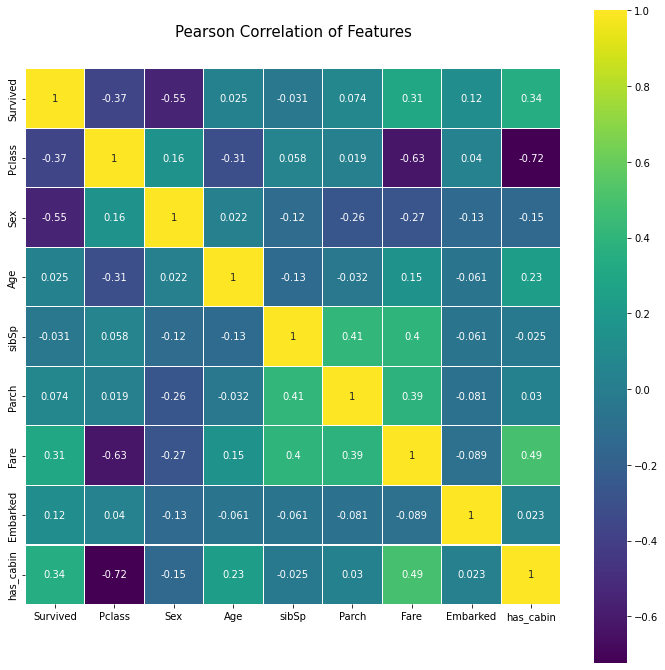

In [190]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [192]:
titanic.corr()['Survived'].sort_values()

Sex         -0.553071
Pclass      -0.367774
sibSp       -0.030860
Age          0.025314
Parch        0.074199
Embarked     0.120038
Fare         0.305322
has_cabin    0.341343
Survived     1.000000
Name: Survived, dtype: float64

Conclusion:
 We can see here that Sex and has_cabin has more correlation with the target feature. While Age and parch and SibSp has the lowest correlation respectively.

In [193]:
# let's train with the 
X,y = titanic.drop(['Survived'],axis=1), titanic['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle = True, random_state=1)

In [194]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [195]:
predicted_value = model.predict(X_test)

In [196]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [197]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_value))

Accuracy: 0.7661290322580645


So, now we have increase our accuracy from 63.33% to 76.61%, can we increase more ,yes we can drop the lowest correlation feature and then train and try to see if the accuracy will get increase or not

In [198]:
data2 = titanic.drop(['sibSp','Age'],axis=1)

In [199]:
# let's train with the 
X,y = titanic.drop(['Survived'],axis=1), titanic['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle = True, random_state=1)

In [200]:
model_2 = DecisionTreeClassifier()
model_2 = model.fit(X_train, y_train)

In [201]:
predicted_value = model_2.predict(X_test)

In [202]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_value))

Accuracy: 0.782258064516129


the accuracy has been increase by 2% this time.

With K-fod cross validation

In [204]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [205]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [206]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X_train, y_train, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.92190889, 0.94577007, 0.92640693, 0.92640693, 0.93073593]), 'Mean Training Accuracy': 93.02457484670066, 'Training Precision scores': array([0.92810458, 0.96103896, 0.92948718, 0.94039735, 0.94701987]), 'Mean Training Precision': 0.9412095868465171, 'Training Recall scores': array([0.8502994 , 0.88622754, 0.86309524, 0.8502994 , 0.85628743]), 'Mean Training Recall': 0.8612418021100655, 'Training F1 scores': array([0.8875    , 0.92211838, 0.89506173, 0.89308176, 0.89937107]), 'Mean Training F1 Score': 0.8994265877292094, 'Validation Accuracy scores': array([0.78448276, 0.74137931, 0.8       , 0.77391304, 0.82608696]), 'Mean Validation Accuracy': 78.51724137931035, 'Validation Precision scores': array([0.71794872, 0.65      , 0.75      , 0.7       , 0.775     ]), 'Mean Validation Precision': 0.7185897435897435, 'Validation Recall scores': array([0.66666667, 0.61904762, 0.65853659, 0.66666667, 0.73809524]), 'Mean Validation Recall': 0.6698025551684088

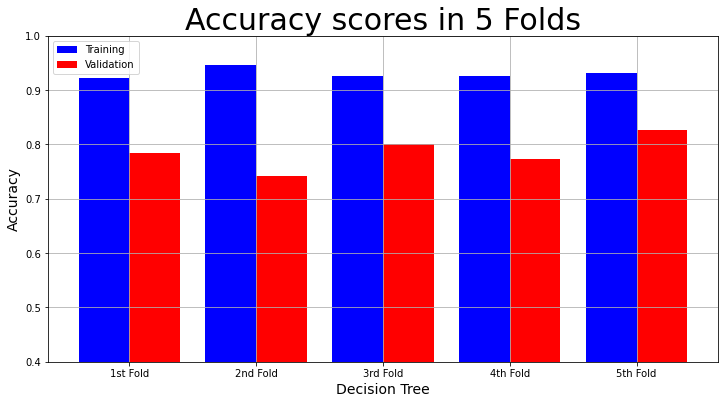

In [209]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

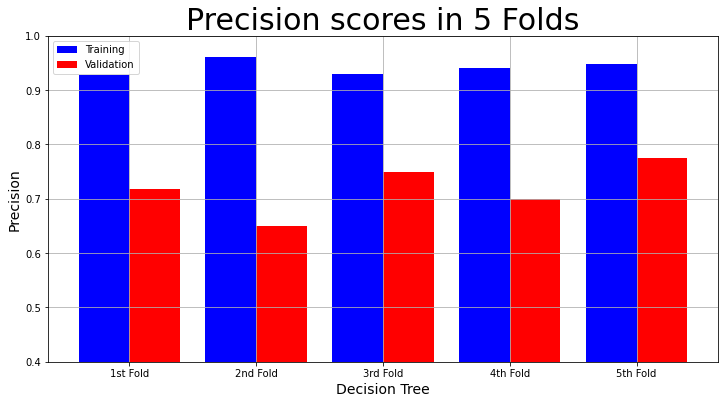

In [210]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

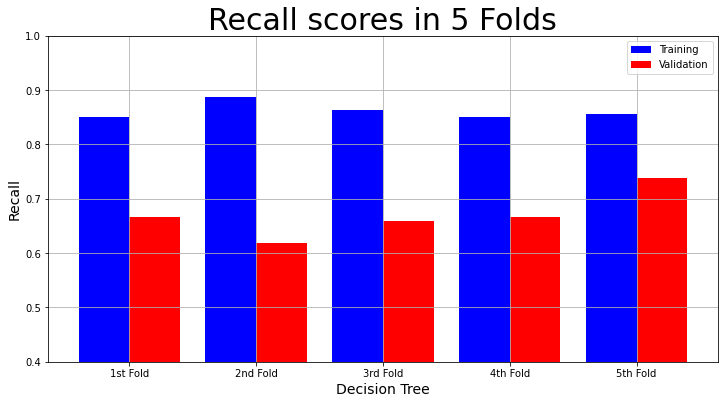

In [211]:
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

In [212]:
decision_tree_model_2 = DecisionTreeClassifier(criterion="entropy",
                                               min_samples_split=5,
                                               random_state=0)
decision_tree_result_2 = cross_validation(decision_tree_model_2, X_train, y_train, 5)
print(decision_tree_result_2)

{'Training Accuracy scores': array([0.90455531, 0.92190889, 0.9047619 , 0.91125541, 0.90909091]), 'Mean Training Accuracy': 91.0314486670235, 'Training Precision scores': array([0.90196078, 0.96453901, 0.93055556, 0.93150685, 0.91390728]), 'Mean Training Precision': 0.928493896208952, 'Training Recall scores': array([0.82634731, 0.81437126, 0.79761905, 0.81437126, 0.82634731]), 'Mean Training Recall': 0.8158112346735102, 'Training F1 scores': array([0.8625    , 0.88311688, 0.85897436, 0.86900958, 0.86792453]), 'Mean Training F1 Score': 0.8683050710115332, 'Validation Accuracy scores': array([0.79310345, 0.75      , 0.82608696, 0.76521739, 0.8       ]), 'Mean Validation Accuracy': 78.68815592203899, 'Validation Precision scores': array([0.725     , 0.67567568, 0.81818182, 0.69230769, 0.72093023]), 'Mean Validation Precision': 0.7264190837446651, 'Validation Recall scores': array([0.69047619, 0.5952381 , 0.65853659, 0.64285714, 0.73809524]), 'Mean Validation Recall': 0.6650406504065041, 

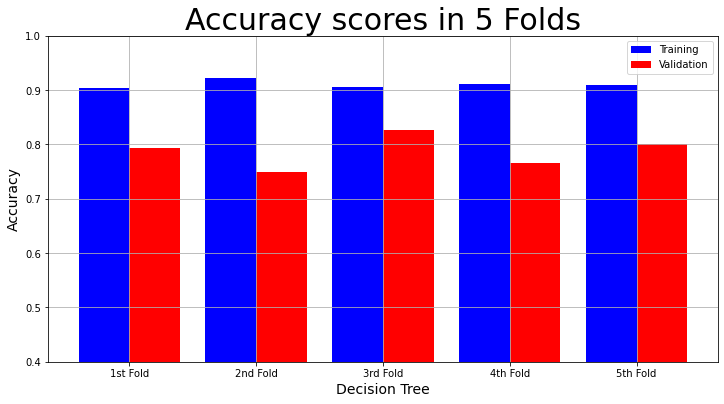

In [213]:
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_2["Training Accuracy scores"],
            decision_tree_result_2["Validation Accuracy scores"])

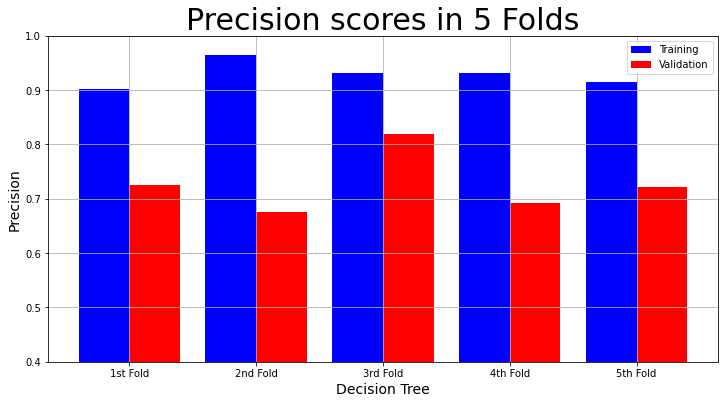

In [214]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_2["Training Precision scores"],
            decision_tree_result_2["Validation Precision scores"])

In [215]:
from sklearn.model_selection import cross_val_score


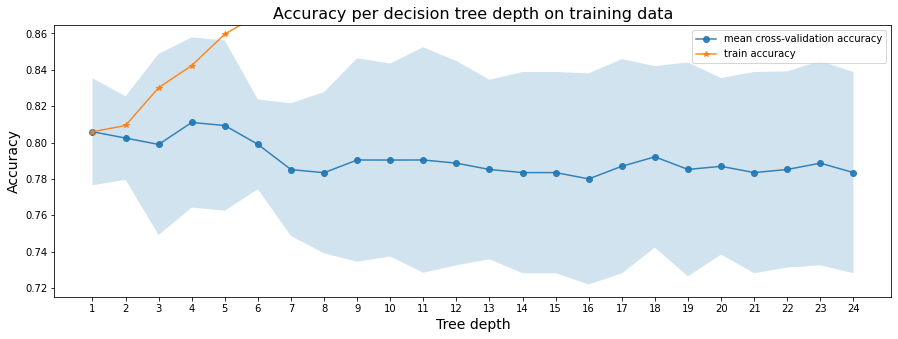

In [216]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [217]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-4 tree achieves the best mean cross-validation accuracy 81.10195 +/- 2.33866% on training dataset


In [219]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return model , accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
model , sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  4
Accuracy, Training Set:  84.22877 %
Accuracy, Test Set:  81.85484 %


So,we have got an accuracy of 84% at the end with the help of kfold

In [222]:
# Let's save the model
import pickle
  
# Save the trained model as a pickle string.
filename = 'titanic_model.sav'
pickle.dump(model, open(filename, 'wb'))